
# <center>  $ Machine\; Learning\; Regression \;assignment $ <br> $ * \; Predicting \;employees \;salary \;based\; on \;Job \;Title \;only\; * $ 
    
## <center> <span style="color:steelblue"> $ Implementing \; ML \; Models: \; Linear \; Regression \;/ \;Random \; Forest /\; Xgboost \; $ </span> <br><br> ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [197]:
import numpy as np
import pandas as pd
import os
pd.options.display.precision = 4
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### &#128218; $ Task \; Dataset \; from:  $ 
### https://catalog.data.gov/dataset/annual-salary-2010-thru-2013-fda95
### State of Washington - Employees Annual Salary 2010 thru 2013
<br>

# $  Data \; collection \; and \; EDA  $  &#128373;

In [129]:
df=pd.read_csv('Annual_Salary_2010_thru_2013.csv')
df.head()

,Agency,AgencyTitle,EmployeeName,JobTitle,Salary2010,Salary2011,Salary2012,Salary2013
0,165,Accountancy,"ASMATH, MOSAR",FORMS & RECORDS ANALYST 2,0,0,0,32272
1,165,Accountancy,"AUBREY, DONALD F",BOARD MEMBER,0,950,1450,0
2,165,Accountancy,"BREN, DIANE MARIE",WMS BAND 3,15004,0,0,0
3,165,Accountancy,"CLARK, ROBIN",BOARD MEMBER,550,0,0,0
4,165,Accountancy,"DONOVAN, KIRSTEN M",ADMINISTRATIVE TRAINEE 3,0,0,0,15182


In [130]:
# Dataset size
df.shape[0]

339763

In [131]:
df.columns

Index(['Agency', 'AgencyTitle', 'EmployeeName', 'JobTitle', 'Salary2010',
       'Salary2011', 'Salary2012', 'Salary2013'],
      dtype='object')

In [132]:
# Remove columns
df.drop(['Agency','AgencyTitle','EmployeeName'] , axis='columns',inplace=True)
df.head()

,JobTitle,Salary2010,Salary2011,Salary2012,Salary2013
0,FORMS & RECORDS ANALYST 2,0,0,0,32272
1,BOARD MEMBER,0,950,1450,0
2,WMS BAND 3,15004,0,0,0
3,BOARD MEMBER,550,0,0,0
4,ADMINISTRATIVE TRAINEE 3,0,0,0,15182


In [133]:
df.describe()

,Salary2010,Salary2011,Salary2012,Salary2013
count,3.3976e+05,3.3976e+05,3.3976e+05,3.3976e+05
mean,1.9798e+04,1.9446e+04,1.9715e+04,2.0325e+04
std,3.0524e+04,3.0444e+04,3.1129e+04,3.1998e+04
min,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
50%,0.0000e+00,0.0000e+00,1.1100e+02,1.8400e+02
75%,3.7804e+04,3.6572e+04,3.6672e+04,3.7822e+04
max,1.9829e+06,2.5292e+06,2.7364e+06,2.6336e+06


In [134]:
df.isnull().isnull().sum()

JobTitle      0
Salary2010    0
Salary2011    0
Salary2012    0
Salary2013    0
dtype: int64

In [135]:
df.dtypes

JobTitle      object
Salary2010     int64
Salary2011     int64
Salary2012     int64
Salary2013     int64
dtype: object

In [136]:
# Clean JobTitle
names=df.JobTitle
names=[n.translate({ord(','):' ',ord('.'):'',ord("'"):"",ord('"'):""}) for n in names]
names=[n.translate({ord('1'):'i',ord('2'):'ii',ord('3'):'iii',ord('4'):'iv',ord('5'):'v',ord('6'):'vi'}) for n in names]
names=[n.replace('  ',' ') for n in names]
names=[n.replace('0','') for n in names]
names=[n.lower() for n in names]
df.JobTitle = names

In [137]:
# Calculate max salary at each year for duplicate JobTitle
df1 = df.groupby('JobTitle')['Salary2010','Salary2011','Salary2012','Salary2013'].max()

In [138]:
df1.head()

,Salary2010,Salary2011,Salary2012,Salary2013
JobTitle,,,,
8vivi a/d audit,0,91384,101771,60210
99999999,0,68000,0,0
[not provided],0,0,0,23530
a & i equip job shop cord,34813,34770,34430,35229
a & sb ab c f o,85017,73162,82392,84726


In [139]:
# Total no. of employees
df1.shape[0]

16914

In [140]:
# Calaulate max salary to be the ML 'target' in a new column
df1['salary']=df1.max(axis=1)

In [141]:
#Remove previous salary colomns
cols = [1,2,3,4]
df1.drop(df.columns[cols],axis=1,inplace=True)
df1.reset_index(inplace=True)
df1.head()

,JobTitle,salary
0,8vivi a/d audit,101771
1,99999999,68000
2,[not provided],23530
3,a & i equip job shop cord,35229
4,a & sb ab c f o,85017


In [142]:
df1.shape[0]

16914

## Removing Outliers

In [143]:
# Annual salaries less then 1,000 or higher then 1,000,000
outl1 = df1.index[df1['salary'] <= 500].tolist()
outl2 = df1.index[df1['salary'] >= 2000000].tolist()
outl3 = df1.index[df1['JobTitle'] == '99999999'].tolist()
outl4 = df1.index[df1['JobTitle'] == '[not provided]'].tolist()
outl=outl1+outl2+outl3+outl4

In [144]:
df1.drop(df1.index[outl], inplace=True);

In [145]:
print('Total rows removed: {}'.format(len(outl)))

Total rows removed: 161


In [146]:
# New no. of emloyees - dataset
df1.shape[0]

16753

In [148]:
df1.head()

,JobTitle,salary
0,8vivi a/d audit,101771
3,a & i equip job shop cord,35229
4,a & sb ab c f o,85017
5,a & sb ab c/opo,82305
6,a m sup - pt orchd,70454


# $   Mechine \; Learning  $ &#128204;  &#8499;&#8466; 


In [183]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score,r2_score
from sklearn.metrics import accuracy_score, pairwise_distances
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler, LabelEncoder
import xgboost as xgb

In [150]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [151]:
# Features
Xfeatures = df1.JobTitle
# targets
y = df1.salary

X_train, X_test, y_train, y_test = train_test_split(Xfeatures, y, test_size= 0.3, random_state=42)

In [152]:
X_train.size

11727

### Handling the text feature - JobTitle
#### Converting the feature text name to a matrix of token counts using CountVectorizer transform

In [153]:
cv = CountVectorizer()
X_train_tf=cv.fit_transform(X_train)

In [154]:
# cv.get_feature_names()

#### Transform the count matrix to a normalized tf or tf-idf representation

In [155]:
X_transformer = TfidfTransformer()
X_tf = X_transformer.fit_transform(X_train_tf)
X_tf.shape

(11727, 4733)

## $ Linear \; Regression \; Model $ &#128201;

In [156]:
LR = LinearRegression()
LR.fit(X_tf, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
preds = LR.predict(X_tf)

In [158]:
print('len of preds',len(preds))
print('len X_train',len(X_train))
print('len y_train',len(y_train))

len of preds 11727
len X_train 11727
len y_train 11727


In [159]:
df_train = pd.DataFrame()
df_train = df_train.assign(JobTitle = X_train,  salary = y_train, pred_salary = preds)

In [160]:
df_train.head()

,JobTitle,salary,pred_salary
1275,assoc dir development,64000,71450.3680
4906,dir distance education,70258,74169.6472
4639,deputy secretary,73657,65888.1355
15962,uid cc ops support mgr,17880,50656.0555
11673,opportunity grant coordin,29236,52070.0591


In [161]:
train_rmse = np.sqrt(MSE(df_train['salary'], 
                       df_train['pred_salary']))
print("RMSE on train = {:.2f}".format(train_rmse))  

RMSE on train = 26911.59


## Model validation

In [162]:
X_test.size

5026

In [163]:
X_tf_test=cv.transform(X_test)

In [164]:
X_transformer = TfidfTransformer()
Xtf_test = X_transformer.fit_transform(X_tf_test)
Xtf_test.shape

(5026, 4733)

In [165]:
test_preds = LR.predict(Xtf_test)

In [166]:
print('len of preds',len(test_preds))
print('len X_test',len(X_test))
print('len y_test',len(y_test))

len of preds 5026
len X_test 5026
len y_test 5026


In [167]:
df_test = pd.DataFrame()
df_test = df_test.assign(JobTitle = X_test,  salary = y_test, pred_salary = test_preds)

In [168]:
df_test

,JobTitle,salary,pred_salary
101,abe esl adv prog coord,38404,37598.8688
13717,reten/trans success mgr,50000,54223.6147
7098,exec dir new initiatives,71391,53516.3954
937,as/d trns adv,46716,56025.3923
2812,chief fin offcr,93917,124062.4235
2203,bldg equipment mechanic,56350,64922.6130
10559,marketing associate,39730,40844.6813
15776,transportation engineer iii,137728,105952.1704
5313,dir public affairs,100368,103402.7085
9976,legis coord,70020,84023.3700


In [169]:
def show_results(scores):
    scores_ = (-scores)  #**0.5
    print(scores_)
    print("Mean:", scores_.mean())
    print("Std:", scores_.std()) 
    return scores_.mean()

In [170]:
print('MSE train:',MSE(y_train, preds),
    '\nMSE test:',MSE(y_test, test_preds),
    '\nr2 train:',r2_score(y_train, preds),
    '\nr2 test:',r2_score(y_test, test_preds),
    '\nexplaind var train:',explained_variance_score(y_train, preds),
    '\nexplaind var test:',explained_variance_score(y_test, test_preds))

MSE train: 724233853.6592717 
MSE test: 1166335518.7516344 
r2 train: 0.5614599934007974 
r2 test: 0.12890561446019477 
explaind var train: 0.5614599934007973 
explaind var test: 0.13127534341787306


In [171]:
scores = cross_val_score(LR, X_tf, y_train,  
                         #scoring='mean_squared_error'  #'neg_mean_squared_error'
                         cv=10)
show_results(scores)

[-0.15998549  0.22387335 -0.17319498 -0.05120526  0.01348073  0.03280116
 -0.18589459 -0.12234881 -0.20543785 -0.13702125]
Mean: -0.07649329814212984
Std: 0.12711572503267135


-0.07649329814212984

In [172]:
test_rmse = np.sqrt(MSE(df_test['salary'], 
                       df_test['pred_salary']))
print("RMSE on test = {:.2f}".format(test_rmse))

RMSE on test = 34151.65


## Visualization

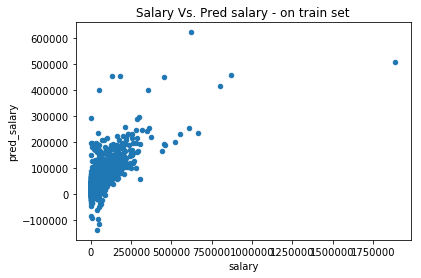

In [173]:
# On train set
df_train.plot(kind='scatter', x='salary', y='pred_salary', title='Salary Vs. Pred salary - on train set');

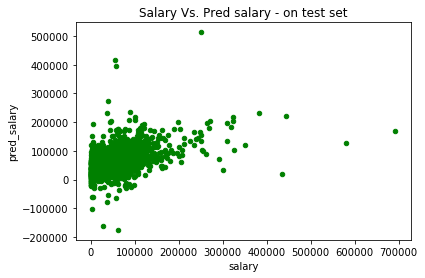

In [174]:
# On test set
df_test.plot(kind='scatter', x='salary', y='pred_salary',title='Salary Vs. Pred salary - on test set',color='g');

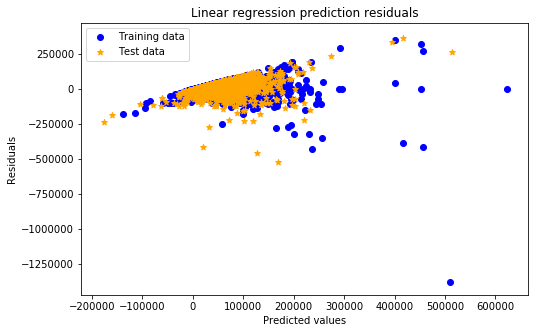

In [176]:
plt.figure(figsize=(8,5))
plt.scatter(df_train.pred_salary, df_train.pred_salary - y_train, c='blue', marker='o', label='Training data')
plt.scatter(df_test.pred_salary, df_test.pred_salary - df_test.salary, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

plt.hlines(y=0, xmin=-5, xmax=45, lw=2, color='k')
plt.title('Linear regression prediction residuals')
plt.show()

### &#10031;  Mean Absolute Error of the Linear Regression model

In [177]:
LR_mae = mae(y_train, preds)
print('Linear Regression Performance on the train set: MAE = %0.4f' % LR_mae)

Linear Regression Performance on the train set: MAE = 13291.1859


In [178]:
LR_test_mae = mae(y_test, test_preds)
print('Linear Regression Performance on the test set: MAE = %0.4f' % LR_test_mae)

Linear Regression Performance on the test set: MAE = 21991.7833



## $ Random \; Forest \; Regression \; model $  &#127794;&#127794;&#127794;

In [184]:
RF = RandomForestRegressor(random_state=0)

In [185]:
clf_rf = GridSearchCV(RF, 
                      param_grid={'max_depth': [8, 10, 12, 14],
                                 'n_estimators': [7,10,12]},
                      iid=False,
                      cv=5)

clf_rf.fit(X_tf, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={'max_depth': [8, 10, 12, 14],
     

In [186]:
print ("Best estimator:", clf_rf.best_estimator_)
print ("Best params:", clf_rf.best_params_)
print ("Best score:", clf_rf.best_score_)

Best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
Best params: {'max_depth': 12, 'n_estimators': 10}
Best score: -0.009909882876902623


In [187]:
RF = RandomForestRegressor(max_depth=12,n_estimators=10, random_state=0)
RF.fit(X_tf, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [188]:
preds=RF.predict(X_tf)

### &#10031;  Mean Absolute Error of the Random Forest Regressor 

In [189]:
RF_mae = mae(y_train, preds)
print('Random Forest Regression Performance on the Train set: MAE = %0.4f' % RF_mae)

Random Forest Regression Performance on the Train set: MAE = 22885.1945


In [190]:
test_preds=RF.predict(Xtf_test)

In [191]:
RF_test_mae = mae(y_test, test_preds)
print('Random Forest Regression Performance on the Test set: MAE = %0.4f' % RF_test_mae)

Random Forest Regression Performance on the Test set: MAE = 23870.6597


## $ XGBoost \;  $  &#9889;

In [192]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=0)

xgb_model.fit(X_tf, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

### &#10031;  Mean Absolute Error of the XGBoost Regressor model

In [193]:
preds=xgb_model.predict(X_tf)

In [194]:
XG_mae = mae(y_train, preds)
print('XGBoost Regressor Performance on the train set: MAE = %0.4f' % XG_mae)

XGBoost Regressor Performance on the train set: MAE = 22252.5405


In [195]:
test_preds=xgb_model.predict(Xtf_test)

In [196]:
XG_test_mae = mae(y_test, test_preds)
print('XGBoost Regressor Performance on the test set: MAE = %0.4f' % XG_test_mae)

XGBoost Regressor Performance on the test set: MAE = 23271.4599
